# Project

# Final Project - Analyzing Sales Data

**Date**: 5 September 2024

**Author**: Thanaphop Threethipthikoon (Discord: 834R#4750)

**Course**: `Data Science Bootcamp 10`  by DataRockie

In [3]:
# import data
import pandas as pd
df = pd.read_csv("sample-store.csv")

In [35]:
# preview top 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [36]:
# shape of dataframe
df.shape

(9994, 21)

In [4]:
# see data frame information using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

We can use `pd.to_datetime()` function to convert columns 'Order Date' and 'Ship Date' to datetime.

In [37]:
# example of pd.to_datetime() function
newdate = pd.to_datetime(df['Order Date'].head(), format='%m/%d/%Y')
newdate

,Order Date
0,2019-11-08
1,2019-11-08
2,2019-06-12
3,2018-10-11
4,2018-10-11


In [38]:
# type of 'Order Date' and 'Shhip date' column
print(type(df['Order Date'][0]), type(df['Ship Date'][0]))

<class 'str'> <class 'str'>


In [4]:
# TODO - convert order date and ship date to datetime in the original dataframe
# convert Order date into the datetime for df
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# convert Ship date into the datetime for df
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [5]:
# type of 'Order Date' and 'Ship date' column
print(type(df['Order Date'][0]), type(df['Ship Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [41]:
# TODO - count nan in postal code column
df['Postal Code'].isna().sum()

11

In [25]:
# TODO - filter rows with missing values
# find rows with missing values in any columns
df[df.isna().any(axis=1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,2235,CA-2020-104066,2020-12-05,2020-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,5275,CA-2018-162887,2018-11-07,2018-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,8799,US-2019-150140,2019-04-06,2019-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,9147,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,9148,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
9148,9149,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
9386,9387,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
9387,9388,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
9388,9389,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9389,9390,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588


In [32]:
# TODO - Explore this dataset on your owns, ask your own questions

## (Optional) Find the missing postal code
The following section is optional for insert the missing postal code we can skip if not need.


---



In [28]:
#(Optional)
# filter rows with Burlington city see only Country/Region, City, state, and postal code
df[df['City'] == 'Burlington'][['Country/Region', 'City', 'State', 'Postal Code']]


,Country/Region,City,State,Postal Code
683,United States,Burlington,North Carolina,27217.0
684,United States,Burlington,North Carolina,27217.0
1008,United States,Burlington,Iowa,52601.0
1038,United States,Burlington,North Carolina,27217.0
1039,United States,Burlington,North Carolina,27217.0
1393,United States,Burlington,North Carolina,27217.0
2234,United States,Burlington,Vermont,NaN
2928,United States,Burlington,North Carolina,27217.0
5065,United States,Burlington,North Carolina,27217.0
5066,United States,Burlington,North Carolina,27217.0


(Optional)
We can see that the customer with address in Burlington city and Vermont state are missing Postal Code. We may need to google the postal code of this address.

After googled, there are 5 postal code for Burlington, Vermont as the following: 05401, 05402, 05403, 05404, 05405.

I decided to select the first one: 05401 for this missing value.


In [29]:
#(Optional)
# find rows with postal code == '05401'
df[df['Postal Code'] == '05401']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [30]:
#(Optional)
# no row found with new postal code
# we can insert this postal code into the missing values
# insert postal code '05401' into the missing values
df['Postal Code'].fillna('05401', inplace=True)

<ipython-input-30-ca37d7f93b8e>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '05401' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Postal Code'].fillna('05401', inplace=True)


Optional section ends here.


---



## Data Analysis Part

Answer 10 below questions to get credit from this course. Write `pandas` code to find answers.

In [33]:
# TODO 01 - how many columns, rows in this dataset
df.shape

(9994, 21)

Use the `df.shape` to see the columns and rows no.
There are **9994 rows and 21 columns.**

In [42]:
# TODO 02 - is there any missing values?, if there is, which colunm? how many nan values?
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country/Region,0
City,0


There is **11 missing values** in **Postal Code** column.

In [44]:
# TODO 03 - your friend ask for `California` data, filter it and export csv for him
# filter data for 'California' state.
california_df = df[df['State'] == 'California']

# export california_df into csv
california_df.to_csv('california_data.csv', index=False)

Exported the 'California' data.
The parameters `index=False` used to excluded the index label.
It may be easier for friend to use this data in R or other programming language.

In [65]:
# TODO 04 - your friend ask for all order data in `California` and `Texas` in 2017 (look at Order Date), send him csv file
# filter the data of 2017
df_2017 = df[(df['Order Date'] >= '2017-01-01') & (df['Order Date'] <= '2017-12-31')]
# filter the data in 'California' and 'Taxas' in 2017
California_Texas_2017_data = df_2017.query("State == 'California' or State == 'Texas'")
#export California_Texas_2017_data into csv file
California_Texas_2017_data.to_csv('California_Texas_2017_data.csv', index=False)

In [84]:
# TODO 05 - how much total sales, average sales, and standard deviation of sales your company make in 2017
#print total sales of df_2017
print("total sales: ",df_2017['Sales'].sum())
#print average sales
print("average sales :",df_2017['Sales'].mean())
#print std of sales
print("standard deviation : ",df_2017['Sales'].std())


total sales:  484247.4981
average sales : 242.97415860511794
standard deviation :  754.0533572593683


In 2017, We got:

total sales:  484247.4981

average sales : 242.97415860511794

standard deviation of sales :  754.0533572593683

In [9]:
# TODO 06 - which Segment has the highest profit in 2018
# filter the data of 2018
df_2018 = df[(df['Order Date'] >= '2018-01-01') & (df['Order Date'] <= '2018-12-31')]
#max profit in df_2018
df_2018.groupby('Segment')['Profit'].agg(['max']).reset_index()

,Segment,max
0,Consumer,3177.4750
1,Corporate,2302.9671
2,Home Office,1906.4850


The `Comsumer` segment has highest profit in 2018

In [97]:
# TODO 07 - which top 5 States have the least total sales between 15 April 2019 - 31 December 2019
#filter date between 15 April 2019 - 31 December 2019
df_hlfAprtoDec2019 = df[(df['Order Date'] >= '2019-04-15') & (df['Order Date'] <= '2019-12-31')]

#find top 5 sales in df_hlfAprtoDec2019
df_hlfAprtoDec2019.groupby('State')['Sales'].agg(['sum']).reset_index().sort_values(by='sum').head(5)

,State,sum
26,New Hampshire,49.05
28,New Mexico,64.08
7,District of Columbia,117.07
16,Louisiana,249.80
36,South Carolina,502.48


The top 5 states with least total sales between 15 April 2019 - 31 December 2019 are:
1.   New Hampshire
2.   New Mexico
3.   District of Columbia
4.   Louisiana
5. 	 South Carolina






In [102]:
# TODO 08 - what is the proportion of total sales (%) in West + Central in 2019 e.g. 25%
# filter data in 2019
df_2019 = df[(df['Order Date'] >= '2019-01-01') & (df['Order Date'] <= '2019-12-31')]

# sum the sales from 'West' and 'Central' Region from 2019
sum_sales_west_central = df_2019[df_2019['Region'].isin(['West', 'Central'])]['Sales'].sum()

# find proportion of total sales (%) from both regions
proportion_west_central = (sum_sales_west_central*1.0 / df_2019['Sales'].sum()) * 100
print(f"The proportion of total sales (%) in West + Central in 2019 : {proportion_west_central:.2f}%")


The proportion of total sales (%) in West + Central in 2019 : 54.97%


In [6]:
# TODO 09 - find top 10 popular products in terms of number of orders vs. total sales during 2019-2020
# filter data in 2019-2020
df_2019_2020 = df[(df['Order Date'] >= '2019-01-01') & (df['Order Date'] <= '2020-12-31')]

# find top 10 popular products in terms of number of orders
print("Top 10 popular products in terms of number of orders:")
df_2019_2020.groupby('Product Name')['Order ID'].agg(['count']).reset_index().sort_values(by='count', ascending=False).head(10)



Top 10 popular products in terms of number of orders:


,Product Name,count
512,Easy-staple paper,27
1412,Staples,24
1406,Staple envelope,22
1413,Staples in misc. colors,13
1409,Staple remover,12
1421,Storex Dura Pro Binders,12
411,Chromcraft Round Conference Tables,12
732,"Global Wood Trimmed Manager's Task Chair, Khaki",11
250,Avery Non-Stick Binders,11
1410,Staple-based wall hangings,10


Top 10 popular products in terms of number of orders:


1.   Easy-staple paper
2.	Staples
3.	Staple envelope
4.	Staples in misc. colors
5.	Staple remover
6.	Storex Dura Pro Binders
7.	Chromcraft Round Conference Tables
8.	Global Wood Trimmed Manager's Task Chair, Khaki
9.	Avery Non-Stick Binders
10.	Staple-based wall hangings


<Axes: title={'center': 'Max Profit by Segment in 2018'}>

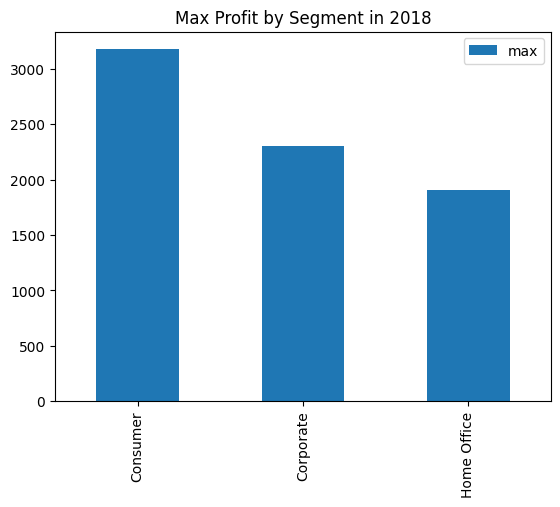

In [29]:
# TODO 10 - plot at least 2 plots, any plot you think interesting :)
import matplotlib.pyplot as plt

# from TODO 06
# filter the data of 2018
df_2018 = df[(df['Order Date'] >= '2018-01-01') & (df['Order Date'] <= '2018-12-31')]
#max profit in df_2018
df2018forplot = (df_2018.groupby('Segment')['Profit'].agg(['max']).reset_index())

# plot the bar chart from above data
df2018forplot.plot(kind='bar', x='Segment', y='max', title='Max Profit by Segment in 2018',xlabel='')

<Axes: title={'center': 'Total Sales by Segment in 2018'}>

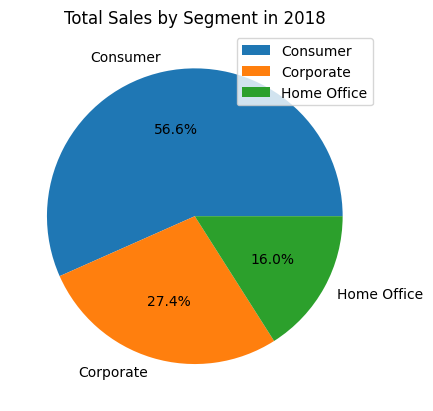

In [28]:
# sum sales in each segments
# save into new variable for pie chart
df2018forpie = df_2018.groupby('Segment')['Sales'].agg(['sum']).reset_index()

# plot a pie chart
df2018forpie.plot(kind='pie', y='sum', labels=df2018forpie['Segment'], autopct='%1.1f%%', title='Total Sales by Segment in 2018',ylabel='')

In [30]:
# TODO Bonus - use np.where() to create new column in dataframe to help you answer your own questions
# Create a boolean column for profit > 0, name it positive profit.
import numpy as np
df['pos_profit'] = np.where(df['Profit'] > 0, True, False)

In [31]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,pos_profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,True
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,True
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,True
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,False
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,True
